### Comparazione vari SLIM Elastic

In [1]:
import os 
import sys
while os.path.split(os.getcwd())[1] != 'RecSysChallenge2023-Team':
    os.chdir('..')
sys.path.insert(1, os.getcwd())

import numpy as np

In [2]:
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
from Evaluation.Evaluator import EvaluatorHoldout

import Daniele.Utils.MyDataManager as dm 
import Daniele.Utils.MatrixManipulation as mm

URMv = dm.getURMviews()
URMo = dm.getURMopen()
ICMt=dm.getICMt()
ICMl=dm.getICMl()


URMv_train, URMv_test = split_train_in_two_percentage_global_sample(URMv, train_percentage = 0.80)

urm_bin = mm.defaultExplicitURM(urmv=URMv_train,urmo=URMo, normalize=False, add_aug=True)
urm_bin.data = np.ones(len(urm_bin.data))

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team


100%|██████████| 663370/663370 [00:00<00:00, 1116119.51it/s]


### REFERENCE RP3Beta 0.052

In [3]:
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender

reference_052 = RP3betaRecommender(urm_bin)
#{'topK': 106, 'alpha': 0.6155817289031643, 'beta': 0.33427474623540737, 'normalize_similarity': True} -> MAP 0.0276355
reference_052.fit(topK= 106, alpha= 0.6155817289031643, beta= 0.33427474623540737, normalize_similarity= True)


RP3betaRecommender: URM Detected 3461 (12.4%) items with no interactions.
RP3betaRecommender: Similarity column 27968 (100.0%), 4182.03 column/sec. Elapsed time 6.69 sec


### RP3Beta - Usato nell'hybrid (sub map -> 0.05932) 

In [4]:
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender

rp3beta_hybrid_059 = RP3betaRecommender(urm_bin)
# {'topK': 69, 'alpha': 0.6854042891733674, 'beta': 0.2763471245555947, 'normalize_similarity': True} -> MAP 0.0282084
rp3beta_hybrid_059.fit( topK=69, alpha=0.6854042891733674, beta=0.2763471245555947, normalize_similarity=True )

RP3betaRecommender: URM Detected 3461 (12.4%) items with no interactions.
RP3betaRecommender: Similarity column 27968 (100.0%), 4559.42 column/sec. Elapsed time 6.13 sec


### RP3Beta - Opt gruppi con tante interazioni (gruppo 8 in poi)

In [5]:
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender

rp3beta_high = RP3betaRecommender(urm_bin)
# {'topK': 91, 'alpha': 0.7758215673815734, 'beta': 0.2719143753442684, 'normalize_similarity': True} -> MAP 0.0.0273508
rp3beta_high.fit( topK=91, alpha=0.7758215673815734, beta=0.2719143753442684, normalize_similarity=True )

RP3betaRecommender: URM Detected 3461 (12.4%) items with no interactions.
RP3betaRecommender: Similarity column 27968 (100.0%), 4398.91 column/sec. Elapsed time 6.36 sec


### RP3Beta - Opt gruppi con poche interazioni (gruppo 8 in giù)

In [6]:
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender

rp3beta_low = RP3betaRecommender(urm_bin)
# {'topK': 134, 'alpha': 0.798809794870576, 'beta': 0.1763388006809379, 'normalize_similarity': True} -> MAP 0.0078248
rp3beta_low.fit( topK=134, alpha=0.798809794870576, beta=0.1763388006809379, normalize_similarity=True )

RP3betaRecommender: URM Detected 3461 (12.4%) items with no interactions.
RP3betaRecommender: Similarity column 27968 (100.0%), 3989.35 column/sec. Elapsed time 7.01 sec


### Users group

In [7]:
import numpy as np 
import scipy.sparse as sps

profile_length = np.ediff1d(sps.csr_matrix(URMv).indptr)
profile_length, profile_length.shape

block_size = int(len(profile_length)*0.05)
sorted_users = np.argsort(profile_length)

for group_id in range(0, 20):
    start_pos = group_id * block_size
    end_pos = min((group_id+1) * block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))

Group 0, #users in group 2081, average p.len 6.98, median 7.0, min 2, max 9
Group 1, #users in group 2081, average p.len 9.43, median 9.0, min 9, max 10
Group 2, #users in group 2081, average p.len 10.69, median 11.0, min 10, max 11
Group 3, #users in group 2081, average p.len 11.83, median 12.0, min 11, max 12
Group 4, #users in group 2081, average p.len 12.88, median 13.0, min 12, max 13
Group 5, #users in group 2081, average p.len 13.92, median 14.0, min 13, max 14
Group 6, #users in group 2081, average p.len 14.92, median 15.0, min 14, max 15
Group 7, #users in group 2081, average p.len 16.00, median 16.0, min 15, max 17
Group 8, #users in group 2081, average p.len 17.22, median 17.0, min 17, max 18
Group 9, #users in group 2081, average p.len 18.42, median 18.0, min 18, max 19
Group 10, #users in group 2081, average p.len 19.75, median 20.0, min 19, max 21
Group 11, #users in group 2081, average p.len 21.44, median 21.0, min 21, max 22
Group 12, #users in group 2081, average p.len

In [8]:
MAP_recommender_per_group = {}
recommender_object_dict = {}

recommender_class = {"reference_052" :reference_052,
                     "rp3beta_hybrid_059" : rp3beta_hybrid_059,
                     "rp3beta_high" : rp3beta_high,
                     "rp3beta_low" : rp3beta_low,                
                     }


for label, recommender_obj in recommender_class.items():
    recommender_object_dict[label] = recommender_obj

In [9]:
cutoff = 10

for group_id in range(0, 20):
    
    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id, 
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))
    
    
    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]
    
    evaluator_test = EvaluatorHoldout(URMv_test, cutoff_list=[cutoff], ignore_users=users_not_in_group)
    
    for label, recommender in recommender_object_dict.items():
        result_df, _ = evaluator_test.evaluateRecommender(recommender)
        if label in MAP_recommender_per_group:
            MAP_recommender_per_group[label].append(result_df.loc[cutoff]["MAP"])
        else:
            MAP_recommender_per_group[label] = [result_df.loc[cutoff]["MAP"]]

Group 0, #users in group 2081, average p.len 6.98, median 7.0, min 2, max 9
EvaluatorHoldout: Ignoring 1513 ( 3.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1620 (100.0%) in 1.16 sec. Users per second: 1396
EvaluatorHoldout: Processed 1620 (100.0%) in 1.10 sec. Users per second: 1470
EvaluatorHoldout: Processed 1620 (100.0%) in 1.11 sec. Users per second: 1456
EvaluatorHoldout: Processed 1620 (100.0%) in 1.16 sec. Users per second: 1398
Group 1, #users in group 2081, average p.len 9.43, median 9.0, min 9, max 10
EvaluatorHoldout: Ignoring 1513 ( 3.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1817 (100.0%) in 1.26 sec. Users per second: 1446
EvaluatorHoldout: Processed 1817 (100.0%) in 1.24 sec. Users per second: 1467
EvaluatorHoldout: Processed 1817 (100.0%) in 1.20 sec. Users per second: 1516
EvaluatorHoldout: Processed 1817 (100.0%) in 1.22 s

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2045 (100.0%) in 1.30 sec. Users per second: 1575


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2045 (100.0%) in 1.25 sec. Users per second: 1634


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2045 (100.0%) in 1.27 sec. Users per second: 1604


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2045 (100.0%) in 1.29 sec. Users per second: 1581
Group 10, #users in group 2081, average p.len 19.75, median 20.0, min 19, max 21
EvaluatorHoldout: Ignoring 1513 ( 3.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2054 (100.0%) in 1.30 sec. Users per second: 1580
EvaluatorHoldout: Processed 2054 (100.0%) in 1.25 sec. Users per second: 1643
EvaluatorHoldout: Processed 2054 (100.0%) in 1.27 sec. Users per second: 1616
EvaluatorHoldout: Processed 2054 (100.0%) in 1.30 sec. Users per second: 1576
Group 11, #users in group 2081, average p.len 21.44, median 21.0, min 21, max 22
EvaluatorHoldout: Ignoring 1513 ( 3.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2059 (100.0%) in 1.31 sec. Users per second: 1570
EvaluatorHoldout: Processed 2059 (100.0%) in 1.26 sec. Users per second: 1639
EvaluatorHoldout: Processed 2059 (100.0%) 

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2076 (100.0%) in 1.28 sec. Users per second: 1623
EvaluatorHoldout: Processed 2076 (100.0%) in 1.31 sec. Users per second: 1586


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2076 (100.0%) in 1.33 sec. Users per second: 1562
Group 14, #users in group 2081, average p.len 28.37, median 28.0, min 27, max 30
EvaluatorHoldout: Ignoring 1513 ( 3.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2074 (100.0%) in 1.34 sec. Users per second: 1546


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2074 (100.0%) in 1.28 sec. Users per second: 1619


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2074 (100.0%) in 1.31 sec. Users per second: 1583


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2074 (100.0%) in 1.33 sec. Users per second: 1559


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


Group 15, #users in group 2081, average p.len 31.88, median 32.0, min 30, max 34
EvaluatorHoldout: Ignoring 1513 ( 3.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2081 (100.0%) in 1.35 sec. Users per second: 1538
EvaluatorHoldout: Processed 2081 (100.0%) in 1.28 sec. Users per second: 1620
EvaluatorHoldout: Processed 2081 (100.0%) in 1.32 sec. Users per second: 1571
EvaluatorHoldout: Processed 2081 (100.0%) in 1.35 sec. Users per second: 1546
Group 16, #users in group 2081, average p.len 36.44, median 36.0, min 34, max 39
EvaluatorHoldout: Ignoring 1513 ( 3.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2081 (100.0%) in 1.37 sec. Users per second: 1521
EvaluatorHoldout: Processed 2081 (100.0%) in 1.30 sec. Users per second: 1603
EvaluatorHoldout: Processed 2081 (100.0%) in 1.33 sec. Users per second: 1564
EvaluatorHoldout: Processed 2081 (100.0%) 

/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 1.43 sec. Users per second: 1457


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 1.36 sec. Users per second: 1526


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 2081 (100.0%) in 1.39 sec. Users per second: 1502


/Users/daniele/Desktop/RecSys/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 2081 (100.0%) in 1.42 sec. Users per second: 1470
Group 19, #users in group 2081, average p.len 87.91, median 78.0, min 62, max 281
EvaluatorHoldout: Ignoring 1513 ( 3.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2081 (100.0%) in 1.54 sec. Users per second: 1350
EvaluatorHoldout: Processed 2081 (100.0%) in 1.42 sec. Users per second: 1469
EvaluatorHoldout: Processed 2081 (100.0%) in 1.48 sec. Users per second: 1406
EvaluatorHoldout: Processed 2081 (100.0%) in 1.54 sec. Users per second: 1350


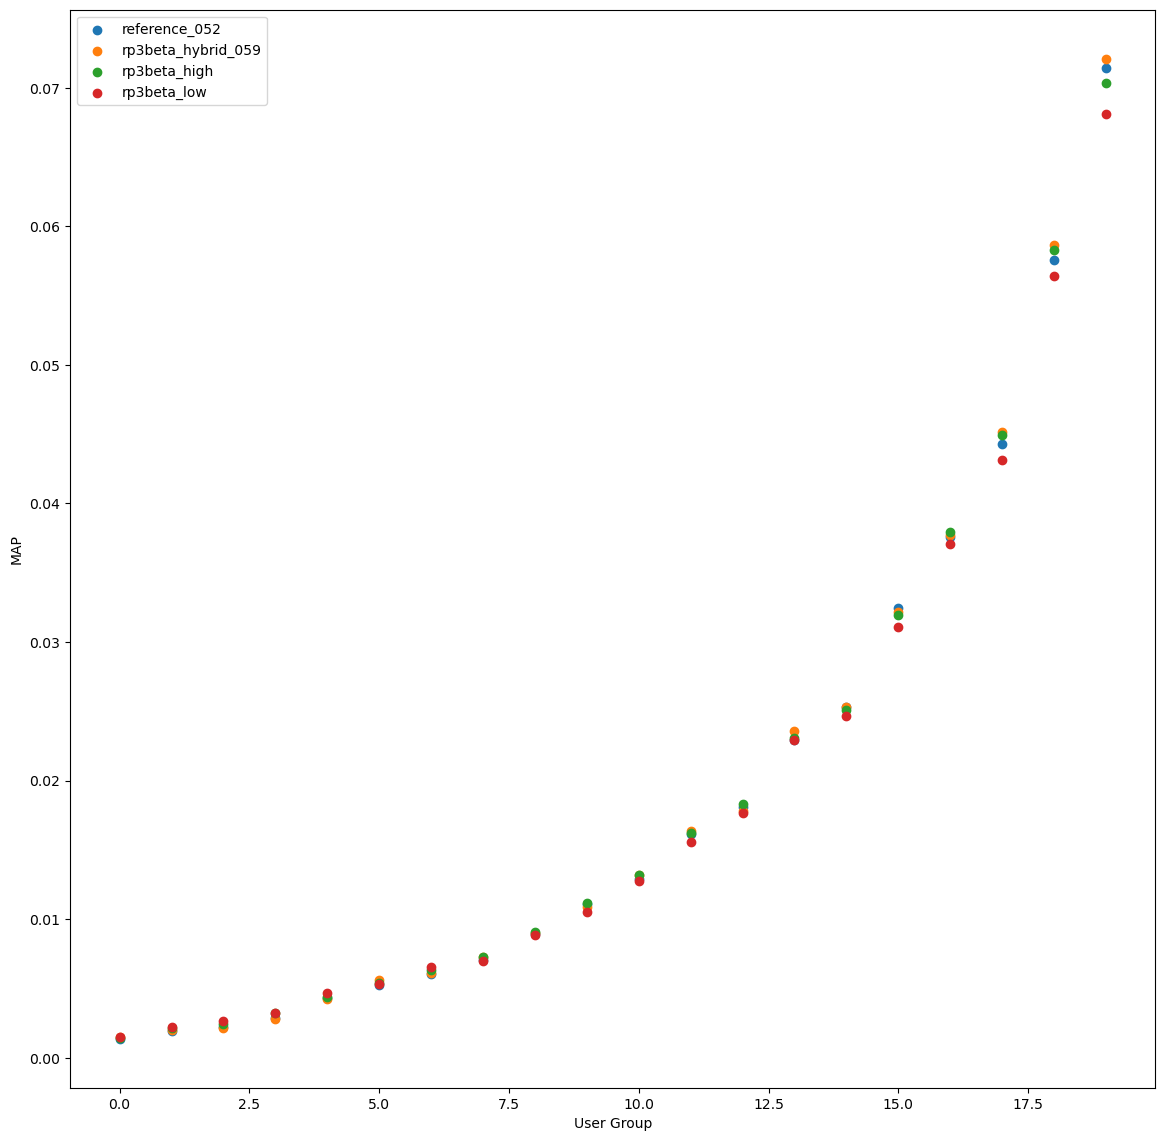

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline  

_ = plt.figure(figsize=(14, 14))
for label, recommender in recommender_object_dict.items():
    results = MAP_recommender_per_group[label]
    plt.scatter(x=np.arange(0,len(results)), y=results, label=label,)
plt.ylabel('MAP')
plt.xlabel('User Group')
plt.legend()
plt.show()

In [11]:
evaluator_test = EvaluatorHoldout(URMv_test, [10])
ris, _ = evaluator_test.evaluateRecommender(hybrid)
ris

EvaluatorHoldout: Ignoring 1513 ( 3.6%) Users that have less than 1 test interactions


NameError: name 'hybrid' is not defined

In [ ]:
evaluator_test = EvaluatorHoldout(URMv_test, [10])
ris, _ = evaluator_test.evaluateRecommender(best_reference)
ris

EvaluatorHoldout: Ignoring 1563 ( 3.8%) Users that have less than 1 test interactions


/Users/federicobono/Documenti/Polimi/RecSys/repos/RecSysChallenge2023-Team/Evaluation/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


EvaluatorHoldout: Processed 40066 (100.0%) in 30.17 sec. Users per second: 1328


,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.041035,0.06943,0.065082,0.020278,0.033597,0.134686,0.060508,0.050334,0.272301,0.163688,...,0.962454,0.262077,0.962454,0.047719,9.457064,0.995171,0.109127,0.703185,3.490068,0.276846


In [ ]:
from tqdm import tqdm

f = open("submission.csv", "w+")
f.write("user_id,item_list\n")
for t in tqdm(dm.getUserIDtest_df().user_id):
    recommended_items = recommender.recommend(t, cutoff=10, remove_seen_flag=True)
    well_formatted = " ".join([str(x) for x in recommended_items])
    f.write(f"{t}, {well_formatted}\n")

100%|██████████| 41116/41116 [00:31<00:00, 1303.91it/s]
